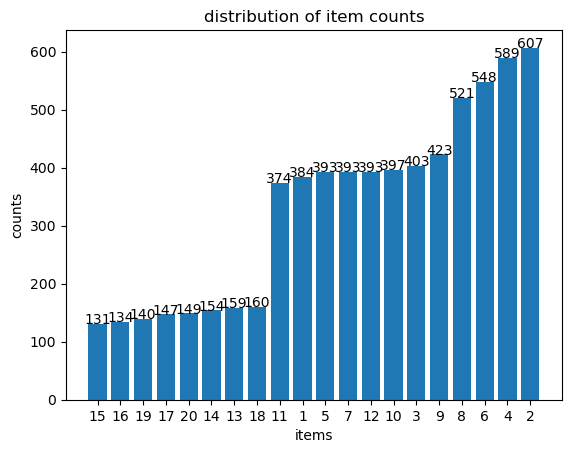

frequent items with support 260: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [1]:
# Part I
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
data = []
file = open('../input/dmkd-hw7/baskets.txt', 'r')
lines = file.readlines()[1:]
for line in lines:
    data.append([int(i) for i in line.split(',')])

# Count the occurrences of each item
itemsCount = dict()
for line in lines:
    basket = [int(i) for i in line.split(',')]
    for item in basket:
        if item in itemsCount:
            itemsCount[item] += 1
        else:
            itemsCount[item] = 1
itemsCount = dict(sorted(itemsCount.items(), key=lambda item: item[1]))

# Plot the item count distribution
x = [str(i) for i in itemsCount.keys()]
y = list(itemsCount.values())
plt.bar(x, y)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center')
plt.title('distribution of item counts')
plt.xlabel('items')
plt.ylabel('counts')
plt.show()

# Flatten the data and count the occurrences of each item
itemsCount = Counter([item for sublist in data for item in sublist])

# Compute frequent items with support 260
frequentItems = [item for item in itemsCount if itemsCount[item] >= 260]
frequentItems.sort()
print(f"frequent items with support 260: {frequentItems}")

In [2]:
# Part II
from itertools import combinations
from collections import defaultdict

# Generate candidate pairs and count their occurrences
pairCounts = defaultdict(int)
for basket in data:
    pairs = combinations(basket, 2)
    for pair in pairs:
        if pair[0] != pair[1]:
            pairCounts[tuple(sorted(pair))] += 1

# Compute frequent pairs with support 260
frequentPairs = [pair for pair in pairCounts if pairCounts[pair] >= 260]
frequentPairs.sort()
print(f"frequent pairs with support 260: {frequentPairs}")

frequent pairs with support 260: [(2, 3), (2, 4), (2, 6), (2, 8), (3, 4), (4, 6), (4, 8), (4, 9), (6, 8)]


In [3]:
# Part III
import itertools
from collections import defaultdict

def pcy(dataset, s, b):
    # 1st Pass: count items and pairs, and hash pairs to buckets
    itemCounts = defaultdict(int)
    bucketCounts = defaultdict(int)
    for basket in dataset:
        for item in basket:
            itemCounts[item] += 1
        for pair in itertools.combinations(sorted(basket), 2):
            bucket = sum(pair) % b
            bucketCounts[bucket] += 1
    
    # 2nd Pass: count frequent pairs
    pairCounts = defaultdict(int)
    for basket in dataset:
        for pair in itertools.combinations(sorted(basket), 2):
            bucket = sum(pair) % b
            if itemCounts[pair[0]] >= s and itemCounts[pair[1]] >= s and bucketCounts[bucket] >= s:
                pairCounts[pair] += 1
    
    return sorted([(key, val) for key, val in pairCounts.items() if val >= s])

freqPairs = pcy(data, 260, 10)
print('number of frequent pairs:')
print(len(freqPairs))
print('list of the frequent pairs sorted in increasing order:')
for pair in freqPairs:
    print(pair[0], pair[1])
print()

freqPairs = pcy(data, 260, 20)
print('number of frequent pairs:')
print(len(freqPairs))
print('list of the frequent pairs sorted in increasing order:')
for pair in freqPairs:
    print(pair[0], pair[1])

number of frequent pairs:
9
list of the frequent pairs sorted in increasing order:
(2, 3) 264
(2, 4) 362
(2, 6) 346
(2, 8) 310
(3, 4) 263
(4, 6) 327
(4, 8) 309
(4, 9) 265
(6, 8) 291

number of frequent pairs:
9
list of the frequent pairs sorted in increasing order:
(2, 3) 264
(2, 4) 362
(2, 6) 346
(2, 8) 310
(3, 4) 263
(4, 6) 327
(4, 8) 309
(4, 9) 265
(6, 8) 291
